___

# Exercise: Classification End to End

### **Gunakan dataset churn**

**Buatlah machine learning model yang dapat memprediksi siapa saja customers yang akan meninggalkan bank!**

- Tujuannya adalah menentukan apakah seorang customer akan melakukan churn (tidak menggunakan jasa lagi) dari bank ini.

**Dataset overview:**
- It consists of 10000 observations and 12 variables.
- Independent variables contain information about customers.
- Dependent variable refers to customer abandonment.

**Features:**
- Surname: Surname
- CreditScore: Credit score
- Geography: Country (Germany/ France/ Spain)
- Gender: Gender (Female/ Male)
- Age: Age
- Tenure: How many years of customer
- Balance: Balance
- NumOfProducts: The number of bank product used
- HasCrCard: Credit card status (0 = No, 1 = Yes)
- IsActiveMember: Active membership status (0 = No, 1 = Yes)
- EstimatedSalary: Estimated salary
- Exited: Churn or not? (0 = No, 1 = Yes)

**Instructions:**
- Lakukan eksplorasi data. Apa saja insight yang kamu dapat?
- Lakukan data cleaning dan preprocessing yang kamu anggap dibutuhkan untuk dataset ini.
- Tentukan metric yang sesuai dengan case dataset ini. Jelaskan alasan mengapa memilih metric tersebut.
- **Lakukan modeling dengan menggunakan model logistic regression, knn, decision tree, random forest, stacking, voting, adaboost, gradientboost, xgboost**.
- Pilih model terbaik dan lakukan hyperparameter tuning.
- Bandingkan hasil sebelum dan sesudah tuning.
- **Bandingkan cost pada skenario bisnis (menggunakan confusion matrix)**:
    - Sebelum menggunakan ML
    - Setelah menggunakan ML

Diketahui pada bidang perbankang:
- retention cost: $20
- acquisition cost: $100


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder


# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier  

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import PolynomialFeatures

## 1. Load Dataset

In [4]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. EDA & Data Cleaning

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

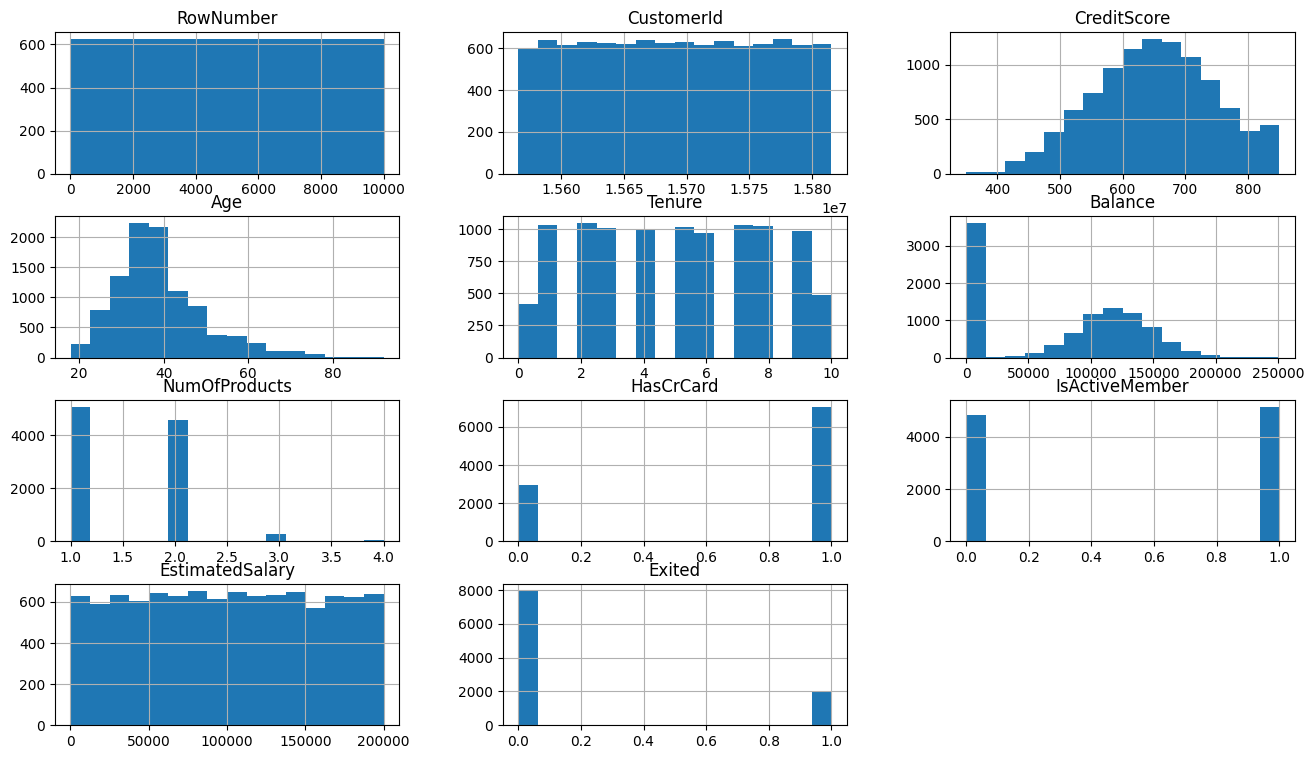

In [8]:
df.hist(bins=16, figsize=(16,9))

<Axes: xlabel='Exited', ylabel='Age'>

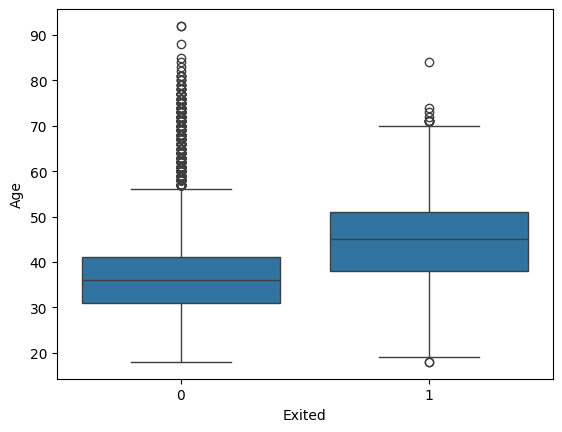

In [9]:
# Age vs Exited

sns.boxplot(data=df, x='Exited', y='Age')

<Axes: xlabel='Exited', ylabel='Balance'>

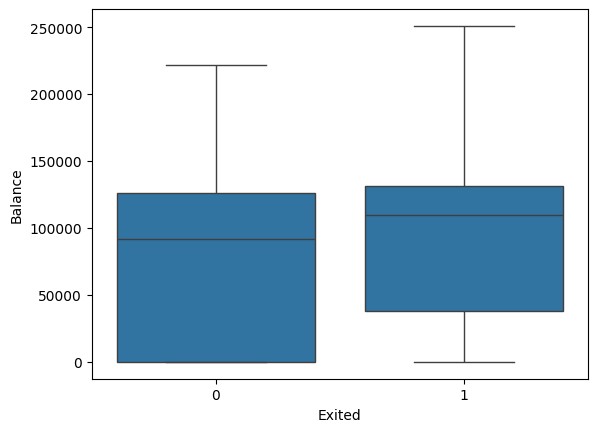

In [10]:
## Exited vs Balance
sns.boxplot(data=df, x='Exited', y='Balance')

<Axes: xlabel='Exited', ylabel='Tenure'>

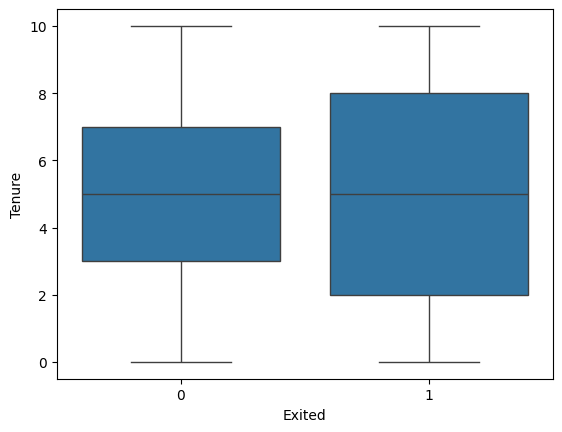

In [11]:
## Exited vs Tenure
sns.boxplot(data=df, x='Exited', y='Tenure')

<Axes: xlabel='Exited', ylabel='CreditScore'>

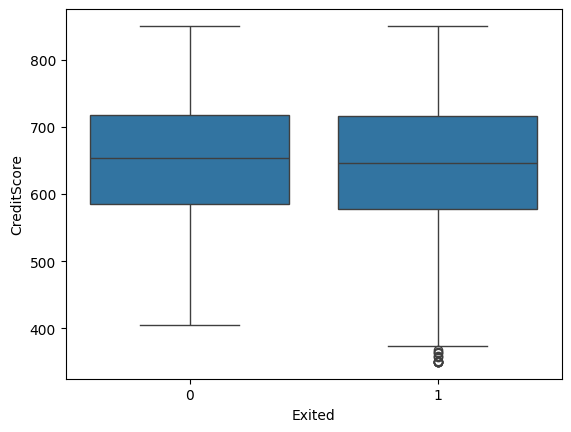

In [12]:
## Exited vs CreditScore
sns.boxplot(data=df, x='Exited', y='CreditScore')

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

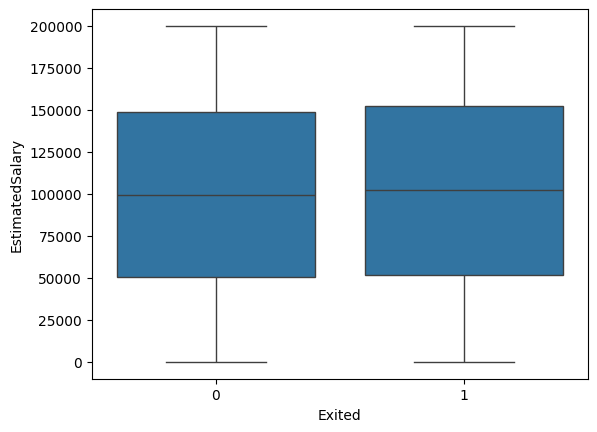

In [13]:
# EstimatedSalary vs Exited

sns.boxplot(data=df, x='Exited', y='EstimatedSalary')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 3. Define X & y

In [15]:
X= df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
y= df['Exited']

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


## 4. Data Splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

## 5. Confusion Matrix Sebelum Menggunakan Machine Learning

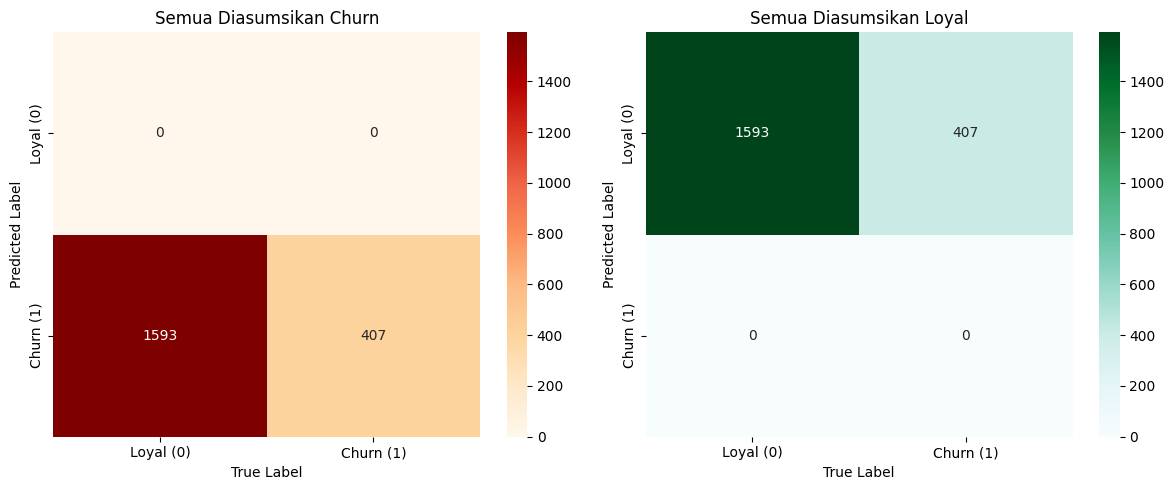

In [17]:
# Confusion matrix untuk dua skenario
all_churn_pred = np.ones_like(y_test)
all_loyal_pred = np.zeros_like(y_test)
cm_churn = confusion_matrix(all_churn_pred, y_test)
cm_loyal = confusion_matrix(all_loyal_pred, y_test)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Skenario 1: Semua diprediksi churn
sns.heatmap(cm_churn, annot=True, fmt='d', cmap='OrRd',
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=axes[0])
axes[0].set_title("Semua Diasumsikan Churn")
axes[0].set_xlabel("True Label")
axes[0].set_ylabel("Predicted Label")

# Skenario 2: Semua diprediksi loyal
sns.heatmap(cm_loyal, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['Loyal (0)', 'Churn (1)'],
            yticklabels=['Loyal (0)', 'Churn (1)'],
            ax=axes[1])
axes[1].set_title("Semua Diasumsikan Loyal")
axes[1].set_xlabel("True Label")
axes[1].set_ylabel("Predicted Label")

plt.tight_layout()
plt.show()

Skenario Pertama : Semua dianggap churn
- Maka Biaya yang dikeluarkan perusahaan adalah 1593 x acqusition cost (100$) = 159300$

Skenario Kedua : Semua dianggap no churn
- Maka Biaya yang dikeluarkan adalah 407 x retention cost (20$) = 8140$

### Metrics Selection (F-3 Score)

Metrics yang akan kami gunakan sebagai evaluasi adalah F-3 Score (lebih ekstrim menekan False Negative ketimbang False Positive). Karena kami ingin menekan jumlah False Negative (mengurangi acqusition cost) dan tidak terlalu mengabaikan False Postive(retention cost).

## 6. Preprocessing

In [18]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['Gender', 'Geography']),
    ('robust', RobustScaler(), ['CreditScore', 'Balance','Age', 'Tenure', 'NumOfProducts',  'EstimatedSalary'])
], remainder='passthrough')


transformer
transformer.fit(X_train)
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

## 7. Cros-Validation

In [19]:
logreg = LogisticRegression(random_state=0, max_iter=1000)
knn = KNeighborsClassifier() 
tree = DecisionTreeClassifier(random_state=0, max_depth=4)


In [20]:
# voting (ensemble)
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
]) 

# stacking (ensemble)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg),
        ('clf2', knn),
        ('clf3', tree)
        ],
    final_estimator= logreg)

In [21]:
# Bagging
bagging = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=0
)

# Random Forest
rf = RandomForestClassifier(random_state=0) 

# Ada Boost
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boost
gboost = GradientBoostingClassifier(random_state=0, )

# XGBoost
xgboost = XGBClassifier(random_state=0)

In [22]:
from sklearn.metrics import fbeta_score, make_scorer

In [23]:
f3_scorer = make_scorer(fbeta_score, beta=3)

In [24]:
# Pilihan model
models = [logreg, knn, tree, voting, stacking, rf, adaboost, gboost, xgboost]


cv_mean = []
cv_std = []
cv_all = []

for i in models:
    
    model_pipe = Pipeline([
        ('prep', transformer), 
        ('model', i)])
    
    model_cv = cross_val_score(
        model_pipe, 
        X_train, 
        y_train, 
        cv=5, 
        scoring=f3_scorer,  # pakai custom f3 scorer
        error_score='raise'
    )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [25]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,"LogisticRegression(max_iter=1000, random_state=0)",0.227390,0.015555,"[0.2074, 0.2334, 0.2131, 0.2507, 0.2323]"
1,KNeighborsClassifier(),0.398113,0.018269,"[0.3944, 0.3792, 0.395, 0.4328, 0.3892]"
2,"DecisionTreeClassifier(max_depth=4, random_sta...",0.416275,0.028792,"[0.4004, 0.4458, 0.389, 0.4561, 0.3901]"
3,"VotingClassifier(estimators=[('clf1',\n ...",0.337014,0.023955,"[0.3116, 0.3453, 0.3297, 0.3793, 0.3192]"
4,"StackingClassifier(estimators=[('clf1',\n ...",0.438098,0.021023,"[0.4223, 0.4387, 0.4548, 0.4663, 0.4084]"
5,RandomForestClassifier(random_state=0),0.472884,0.026594,"[0.4464, 0.5139, 0.4853, 0.4773, 0.4416]"
6,AdaBoostClassifier(random_state=0),0.495772,0.007909,"[0.4878, 0.4987, 0.4901, 0.5098, 0.4924]"
7,GradientBoostingClassifier(random_state=0),0.502833,0.015392,"[0.4803, 0.5011, 0.5181, 0.5215, 0.4932]"
8,"XGBClassifier(base_score=None, booster=None, c...",0.509682,0.022002,"[0.5043, 0.5133, 0.5185, 0.5399, 0.4724]"


## 8. Hyperparameter Tuning

### GridSearch

In [26]:
hyperparam_GradientBoosting = {
    'modeling__n_estimators': [100, 200],
    'modeling__learning_rate': [0.01, 0.1, 0.2],
    'modeling__max_depth': [3, 5, 7],
    'modeling__min_samples_split': [2, 5, 10],
    'modeling__min_samples_leaf': [1, 2, 4],
    'modeling__subsample': [0.8, 1.0],
    'modeling__max_features': ['sqrt', 'log2', None]

}
pipe_model = Pipeline([
    ('prep', transformer),
    ('modeling', gboost)
])

gridsearch = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam_GradientBoosting,
    cv= 5,
    scoring= f3_scorer,
    n_jobs= -1
)

In [27]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Geography']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['CreditScore',
                                                                          'Balance',
                                                                          'Age',
                                                                          'Tenure',
                                                                          'NumOfProducts',
                                                                          'EstimatedSalary'])])),
                                       ('modeling',
                                        GradientBoostingClassifier(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.1, 0.2],
                         'modeling__max_depth': [3, 5, 7],
                         'modeling__max_features': ['sqrt', 'log2', None],
                         'modeling__min_samples_leaf': [1, 2, 4],
                         'modeling__min_samples_split': [2, 5, 10],
                         'modeling__n_estimators': [100, 200],
                         'modeling__subsample': [0.8, 1.0]},
             scoring=make_scorer(fbeta_score, beta=3))

In [28]:
gridsearch.best_score_

0.5305179571470761

In [29]:
gridsearch.best_params_

{'modeling__learning_rate': 0.1,
 'modeling__max_depth': 5,
 'modeling__max_features': 'sqrt',
 'modeling__min_samples_leaf': 1,
 'modeling__min_samples_split': 2,
 'modeling__n_estimators': 200,
 'modeling__subsample': 0.8}

In [30]:
model_gboost_gridsearchtuning = gridsearch.best_estimator_

### RandomizedSearch

In [31]:
model_pipe = Pipeline([
    ('prep', transformer), 
    ('modeling', gboost)]
    )

random_search = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam_GradientBoosting,
    cv= 5,
    scoring= f3_scorer,
    n_jobs= -1,
    n_iter= 500  # jumlah kombinasi pada output
)

In [32]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(),
                                                                               ['Gender',
                                                                                'Geography']),
                                                                              ('robust',
                                                                               RobustScaler(),
                                                                               ['CreditScore',
                                                                                'Balance',
                                                                                'Age',
                                                                                'Tenure',
                                                                                'NumOfProducts',
                                                                                'EstimatedSalary'])])),
                                             ('modeling',
                                              GradientBoostingClassifier(random_state=0))]),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'modeling__learning_rate': [0.01, 0.1,
                                                                    0.2],
                                        'modeling__max_depth': [3, 5, 7],
                                        'modeling__max_features': ['sqrt',
                                                                   'log2',
                                                                   None],
                                        'modeling__min_samples_leaf': [1, 2, 4],
                                        'modeling__min_samples_split': [2, 5,
                                                                        10],
                                        'modeling__n_estimators': [100, 200],
                                        'modeling__subsample': [0.8, 1.0]},
                   scoring=make_scorer(fbeta_score, beta=3))

In [33]:
random_search.best_score_

0.5292187882559327

In [34]:
random_search.best_params_

{'modeling__subsample': 1.0,
 'modeling__n_estimators': 200,
 'modeling__min_samples_split': 10,
 'modeling__min_samples_leaf': 1,
 'modeling__max_features': 'log2',
 'modeling__max_depth': 5,
 'modeling__learning_rate': 0.2}

In [35]:
model_gboost_randomsearchtuning = random_search.best_estimator_

## 9. Predict to Test Set

In [36]:
## Sebelum Tuning
f3_scorer = make_scorer(fbeta_score, beta=3)
base_model = gboost = GradientBoostingClassifier(random_state=0, )
base_model.fit(X_train_prep, y_train)
y_pred_base = base_model.predict(X_test_prep)
f3 = fbeta_score(y_test, y_pred_base, beta=3)
print("F3 Score:", f3)


F3 Score: 0.4569961489088575


In [37]:
## Sesudah Tuning GridSearch
f3_scorer = make_scorer(fbeta_score, beta=3)
model_gboost_gridsearchtuning.fit(X_train, y_train)
y_pred_gridsearch = model_gboost_gridsearchtuning.predict(X_test)
f3 = fbeta_score(y_test, y_pred_gridsearch, beta=3)
print("F3 Score:", f3)


F3 Score: 0.49209586945435996


In [38]:
## Sesudah Tuning RandomSearch
f3_scorer = make_scorer(fbeta_score, beta=3)
model_gboost_randomsearchtuning.fit(X_train, y_train)
y_pred_randomsearch = model_gboost_randomsearchtuning.predict(X_test)
f3 = fbeta_score(y_test, y_pred_randomsearch, beta=3)
print("F3 Score:", f3)


F3 Score: 0.504947982745496


### Perbandingan F3-Score sebelum dan sesudah tuning

Sebelum Tuning : 
- 0.4569961489088575


Sesudah Tuning :
- GridSearch (0.49209586945435996)
- RandomSearch (0.49209586945435996) 

## 10. Confusion Matrix setelah menggunakan model machine learning

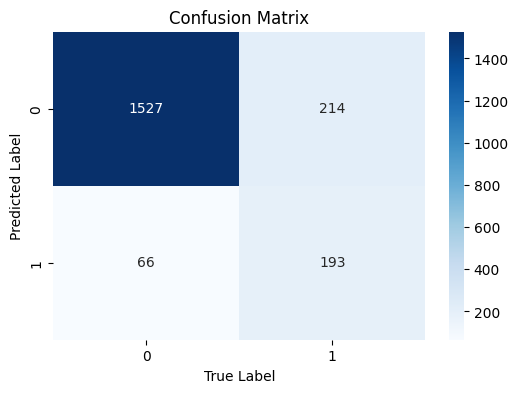

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_pred_gridsearch, y_test), annot=True, fmt='d', cmap='Blues')
plt.ylabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Cost yang dikeluarkan perusahaan setelah menggunakan model machine learning

- Acqusition cost (100$) x 66 = 6600$
- Retention cost (20$) x 214 = 4280$

Total cost = 10880$

## Kesimpulan

Perusahaan lebih sedikit mengeluarkan cost sebelum menggunakan Machine Learning untuk mengklasifiaksi pelanggan churn atau tidak menggunakan skenario kedua di mana perusahaan menganggap pelanggan tidak churn semua. dan hanya mengeluarkan retention cost sebesar 8140$ ketimbang menggunakan machine learning dengan metrics f3-Score yang mengeluarkan cost sebesar 10880$.

In [41]:
import joblib
joblib.dump(model_gboost_gridsearchtuning, "final_model_churn.joblib")

['final_model_churn.joblib']